In [1]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Stock information

In [2]:
stock_ticker = 'PG'
stock_start_date = datetime.date(2013,12,29)
stock_end_date = datetime.date.today()

# Fetch the stock price from Yahoo Finance using yfinance
stock_df = yf.download(stock_ticker, start=stock_start_date, end=stock_end_date)
stock_df.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2694 entries, 2013-12-30 to 2024-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2694 non-null   float64
 1   High       2694 non-null   float64
 2   Low        2694 non-null   float64
 3   Close      2694 non-null   float64
 4   Adj Close  2694 non-null   float64
 5   Volume     2694 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 147.3 KB


In [3]:
df_stock = pd.DataFrame(stock_df[["Close"]])
# We need to extract the year and month from the 'Date' column in both DataFrames
df_stock['Year'] = df_stock.index.year
df_stock['Month'] = df_stock.index.month

# Mapping the month names from the inflation data for merging
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df_stock['Month_Name'] = df_stock['Month'].map(month_map)
df_stock=df_stock.reset_index()

In [4]:
df_stock

,Date,Close,Year,Month,Month_Name
0,2013-12-30,82.000000,2013,12,Dec
1,2013-12-31,81.410004,2013,12,Dec
2,2014-01-02,80.540001,2014,1,Jan
3,2014-01-03,80.449997,2014,1,Jan
4,2014-01-06,80.639999,2014,1,Jan
...,...,...,...,...,...
2689,2024-09-06,175.589996,2024,9,Sep
2690,2024-09-09,176.059998,2024,9,Sep
2691,2024-09-10,177.789993,2024,9,Sep
2692,2024-09-11,173.919998,2024,9,Sep


# 3 US Economic Factor
## Inflation( Source: https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths)

In [5]:
df_inflation_clean = pd.read_excel("inflamation_rate.xlsx", 'BLS Data Series', skiprows=11)
df_inflation_clean.drop(columns=["HALF1","HALF2"])
df_inflation_clean= df_inflation_clean.melt(id_vars=['Year'], 
                                            value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                            var_name='Month_Name', 
                                            value_name='Inflation_Rate')

/Users/jasonsun/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
df_stock_inflation = pd.merge(df_stock, df_inflation_clean, on=['Year', 'Month_Name'], how='left')
df_stock_inflation = df_stock_inflation.dropna(subset=['Inflation_Rate'])

In [7]:
df_stock_inflation

,Date,Close,Year,Month,Month_Name,Inflation_Rate
2,2014-01-02,80.540001,2014,1,Jan,1.6
3,2014-01-03,80.449997,2014,1,Jan,1.6
4,2014-01-06,80.639999,2014,1,Jan,1.6
5,2014-01-07,81.419998,2014,1,Jan,1.6
6,2014-01-08,80.239998,2014,1,Jan,1.6
...,...,...,...,...,...,...
2681,2024-08-26,170.350006,2024,8,Aug,3.2
2682,2024-08-27,169.250000,2024,8,Aug,3.2
2683,2024-08-28,169.059998,2024,8,Aug,3.2
2684,2024-08-29,170.029999,2024,8,Aug,3.2


## GDP Source(https://cdn.ihsmarkit.com/www/default/1020/US-Monthly-GDP-History-Data.xlsx  )

In [8]:
df_GDP=pd.read_excel("GDP.xlsx",sheet_name =2)
df_GDP=df_GDP[["Monthly Real GDP Index","Year","Month_Name"]]
df_stock_inflation_GDP = pd.merge(df_stock_inflation, df_GDP,
                                  on=['Year',"Month_Name"], how='left')
df_stock_inflation_GDP = df_stock_inflation_GDP.dropna(subset=['Monthly Real GDP Index'])

In [9]:
df_stock_inflation_GDP

,Date,Close,Year,Month,Month_Name,Inflation_Rate,Monthly Real GDP Index
0,2014-01-02,80.540001,2014,1,Jan,1.6,17898.263548
1,2014-01-03,80.449997,2014,1,Jan,1.6,17898.263548
2,2014-01-06,80.639999,2014,1,Jan,1.6,17898.263548
3,2014-01-07,81.419998,2014,1,Jan,1.6,17898.263548
4,2014-01-08,80.239998,2014,1,Jan,1.6,17898.263548
...,...,...,...,...,...,...,...
2616,2024-05-24,165.330002,2024,5,May,3.4,22960.985606
2617,2024-05-28,163.110001,2024,5,May,3.4,22960.985606
2618,2024-05-29,161.649994,2024,5,May,3.4,22960.985606
2619,2024-05-30,162.580002,2024,5,May,3.4,22960.985606


## interest rate (https://fred.stlouisfed.org/series/FEDFUNDS )

In [10]:
df_interest= pd.read_csv("interest_rate.csv")
df_interest["DATE"]=pd.to_datetime(df_interest["DATE"])
df_interest["Year"]=df_interest["DATE"].dt.year
df_interest["Month"]=df_interest["DATE"].dt.month

In [11]:
df_stock_inflation_GDP_interest = pd.merge(df_stock_inflation_GDP, df_interest,
                                  on=['Year',"Month"], how='left')

In [12]:
df_stock_inflation_GDP_interest=df_stock_inflation_GDP_interest.drop(columns="DATE")

Interest rate:
Interest rate can help us to predict stock price mainly beacuse it represent the cost of the organization to borrow money for their operation or new project. As the interest rate increase, it increase the cost of the company operate or deploy new project, which leads to diminish of profit. The diminishing of profit push the stock price down.Thus, I think having the intereset rate will help us to predict better on the stock price trend.

GDP:
GDP is a great indicator of a country's economy. When GDP is increase, it means the economy is expaning, business are making money, and consumer increase their spending. All of those have great positive impact on the stock price and vise versa. Thus, having the data of GDP can also help us to predict the stock price since they are very high correlated.

Inflation rate:
Inflation rate is also a great proxy that indicate the status of the economy. When moderate inflation can be a sign of a healthy economy, which could lead to high stock price. However, overly high inflation caused the increase of cost of a company, which might cause low stock price. 

All of those three variables can not perfect predictor for stock price, but they capture the importantn informaiton regarding the current enviornment of stock market, which plays an very important role in the up and downs of stock price. Thus, they could help in predictiong stock price. 

* the Data source is list on the subtitle.
    - GDP Source(https://cdn.ihsmarkit.com/www/default/1020/US-Monthly-GDP-History-Data.xlsx )¶
    - Interest rate Source(https://fred.stlouisfed.org/series/FEDFUNDS )
    - Inflation rate Source ( https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths)

# 2.Assess the relationship between each of the 3 economic factors 

In [13]:
df_stock_inflation_GDP_interest.rename(columns={'FEDFUNDS': "Interest Rate"},inplace = True)

In [14]:
correlation =df_stock_inflation_GDP_interest[['Close', 'Inflation_Rate', 'Monthly Real GDP Index', 'Interest Rate']].corr()
correlation[["Close"]].iloc[1:4]

,Close
Inflation_Rate,0.717708
Monthly Real GDP Index,0.890659
Interest Rate,0.500875


From the correlation table, we can see that Monthly Real GDP has the highest correlation with the stock price of PG, which inidicate that they have a very strong linear relationship. Inflation rate has a correlation of 0.717 with stock prices, which also indicate a strong linear relationship, so as the interest rate. With high value of correlation rate, those 3 variable are great predictors fo stock prices. 

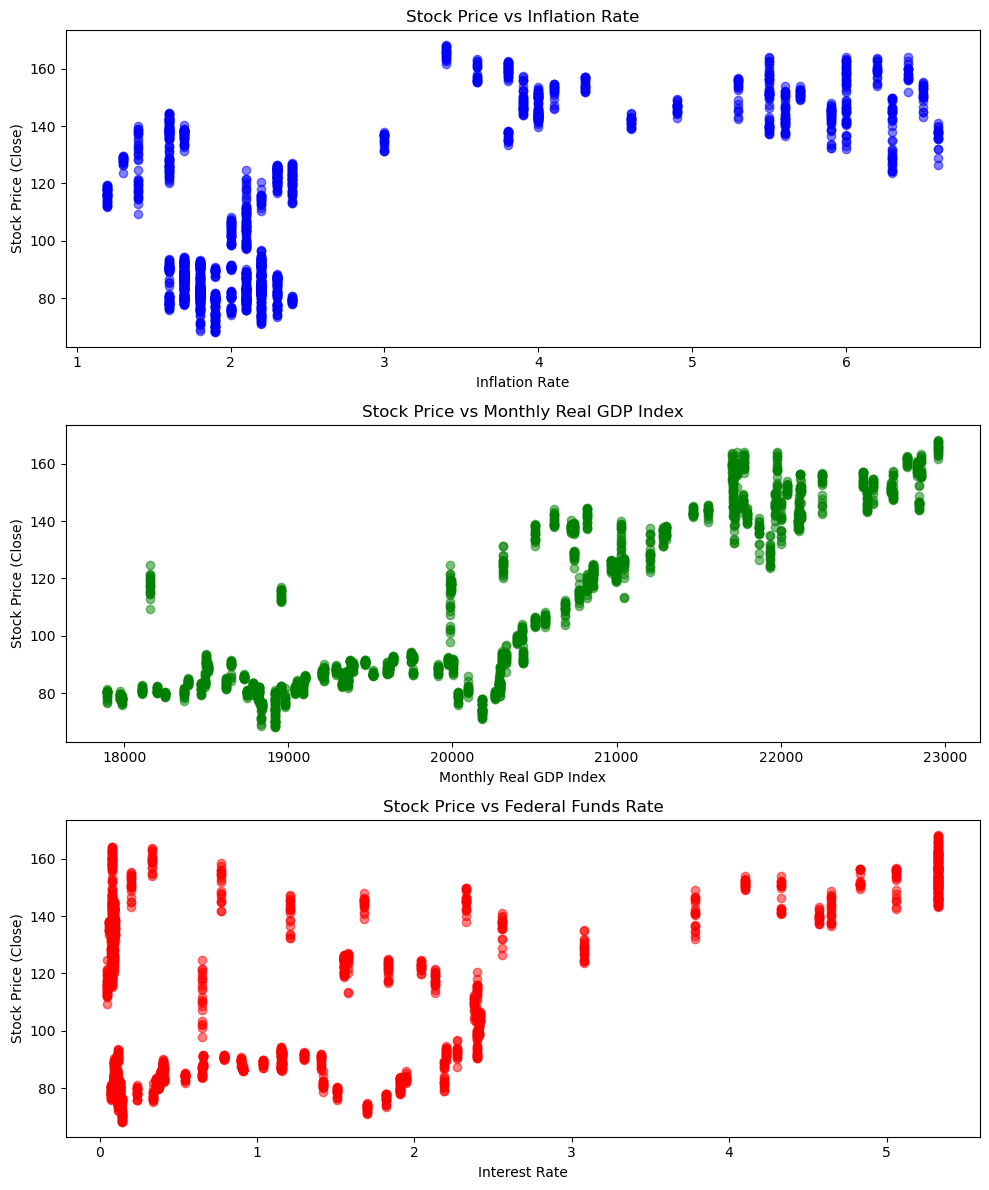

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
axs[0].scatter(df_stock_inflation_GDP_interest['Inflation_Rate'], df_stock_inflation_GDP_interest['Close'], color='blue', alpha=0.5)
axs[0].set_title('Stock Price vs Inflation Rate')
axs[0].set_xlabel('Inflation Rate')
axs[0].set_ylabel('Stock Price (Close)')
axs[1].scatter(df_stock_inflation_GDP_interest['Monthly Real GDP Index'], df_stock_inflation_GDP_interest['Close'], color='green', alpha=0.5)
axs[1].set_title('Stock Price vs Monthly Real GDP Index')
axs[1].set_xlabel('Monthly Real GDP Index')
axs[1].set_ylabel('Stock Price (Close)')
axs[2].scatter(df_stock_inflation_GDP_interest['Interest Rate'], df_stock_inflation_GDP_interest['Close'], color='red', alpha=0.5)
axs[2].set_title('Stock Price vs Federal Funds Rate')
axs[2].set_xlabel('Interest Rate')
axs[2].set_ylabel('Stock Price (Close)')

plt.tight_layout()
plt.show()

From the scatter plot, we have very similar conclusion. In stock price vs GDP, we see a very obvious positive trend. As the GDP increase, the stock price increases as well. If we know a the monthly GDP, then the stock price will exist in a very small range. Inflation rate has very similar situation. This suggests inflation rate and GDP are great predictors for PG stock price. Although interest rate plot shows that it is not as good predictors as the other two, it still shows a generally positive trend, which means it will also work well as a predictors that capture some of the pattern of stock price.

# 3 Forecast

In [16]:
# Since we will use ETS model, which reaquire complete data, 
# we impute the missing value as the last data point
df_stock = pd.DataFrame(stock_df[["Close"]])
df_stock=df_stock[df_stock.index.year!=2013]
stock_df_multiple_NaN = df_stock.reindex(pd.date_range('2014-01-02', "2024-09-12"), fill_value= np.NaN)
stock_df_multiple=stock_df_multiple_NaN.fillna(method="ffill")
stock_df_multiple=stock_df_multiple.resample('M').median()

In [17]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
test_size = 12

train_data, test_data = train_test_split(stock_df_multiple["Close"], test_size=test_size, shuffle = False)

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 117
No. of testing examples: 12


In [18]:
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(12).rename('alpha=%s'%ins3.model.params['smoothing_level'])
double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()
double_ets_add_pred = double_ets_add.forecast(12)
double_ets_mul_pred = double_ets_mul.forecast(12)
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()
triple_ets_add_pred = triple_ets_add.forecast(12)
triple_ets_mul_pred = triple_ets_mul.forecast(12)

In [19]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import mean_absolute_error 
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE','MASE','MDA'])

def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    n = len(actuals)
    naive_forecast_error = np.mean(np.abs(np.diff(actuals)))  
    forecast_error = np.mean(np.abs(actuals - predictions))  
    mase= forecast_error / naive_forecast_error
    mda=np.mean(np.sign(np.diff(actuals)) == np.sign(np.diff(predictions)))

    df = pd.DataFrame({'Model': [model],
                       'RMSE': [rmse],
                       'MAE': [mae],
                       'MAPE': [mape],
                     'MASE':[mase],
                     'MDA':[mda]})

    global metrics_dataframe
    metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)
    return metrics_dataframe

In [20]:
metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast3.values.flatten(),
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_add_pred.values.flatten(),
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_mul_pred.values.flatten(),
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_add_pred.values.flatten(),
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_mul_pred.values.flatten(),
                                'Triple Mul')

In [21]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,MASE,MDA
2,Double Mul,6.826497,6.026081,3.763429,1.356670,0.727273
1,Double Add,7.636137,6.641869,4.117732,1.495304,0.727273
4,Triple Mul,8.550039,7.595908,4.770619,1.710090,0.181818
3,Triple Add,8.675860,7.698110,4.794295,1.733099,0.181818
0,Simple 1,11.355000,9.666669,5.898645,2.176286,0.000000


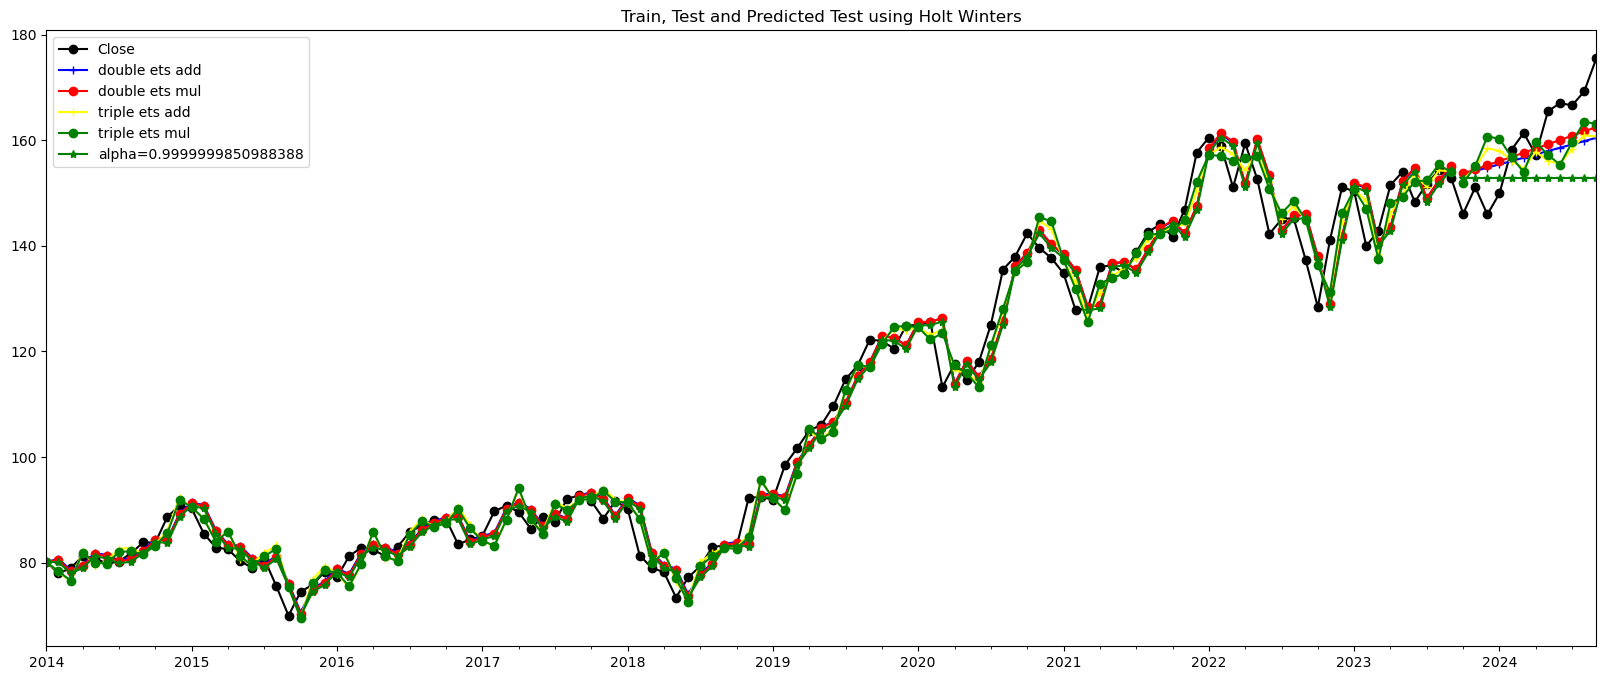

In [22]:
ax = stock_df_multiple.plot(marker='o', color='black', figsize=(20,8), legend=True)

double_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'double ets add')
double_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

double_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'double ets mul')
double_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

triple_ets_add_pred.plot(marker='+', ax=ax, color='yellow', legend=True, label = 'triple ets add')
triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='yellow')

triple_ets_mul_pred.plot(marker='o', ax=ax, color='green', legend=True, label = 'triple ets mul')
triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='green')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()

The other two metrics that I used are `Mean Absolute Scaled Error` and `Mean Directional Accuracy` 

`Mean Absolute Scaled Error`: MASE compares the predict error with the predict error of a naive model, which the naive model serve as a base line model for comparison. This accuracy metrics works great in our situation is because it compares model’s performance with the baseline, which makes this scale independent.Scale independent enable us to compare the model performance across different stocks(some stock price are extremely low, some are super high). 

`Mean Directional Accuracy` : MDA measures if the model prediction direction is same as the actual direction. This is critical is because when trading stocks, sometimes knowing the direction of the stock price is proficient for us to make money. We don't need it to get very closed to the actual value, but we do well in knowing if the stock is going to go up and down.

Base on the matrics abover, we see that Double ETS with Multiplicative Trend tend to perform well in all the metrics. The reason behind might because there isn't that much seasonality exist in this data, and the double ETS capture better trend pattern compare to triple one. Also, the triple ETS due to the adding complexity, the model might overfit and not capture the genral pattern that is more important.  
